In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## MCTS Plots

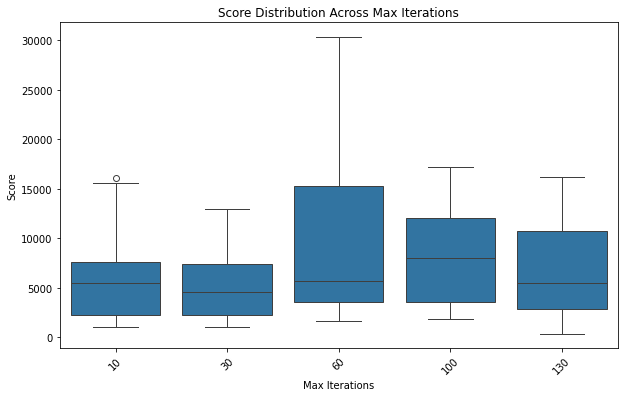

In [19]:
max_iter_values = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                   30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
                   60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
                   100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                   130, 130, 130, 130, 130, 130, 130, 130, 130, 130]

scores = [1072, 992, 7076, 3420, 15588, 7784, 16052, 6568, 1836, 4276,
          5224, 12524, 2392, 3856, 2232, 1004, 1092, 7964, 12972, 5788,
          3492, 1604, 2504, 26528, 7288, 30336, 4012, 11984, 16380, 3560,
          1864, 17156, 10656, 4024, 10512, 14456, 3408, 5504, 12492, 2144, 
          11756, 14532, 6108, 3988, 940, 4924, 16208, 7736, 2468, 356]

# Create DataFrame
df = pd.DataFrame({'max_iter': max_iter_values, 'score': scores})

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='max_iter', y='score', data=df)
plt.xlabel('Max Iterations')
plt.ylabel('Score')
plt.title('Score Distribution Across Max Iterations')
plt.xticks(rotation=45)
plt.show()



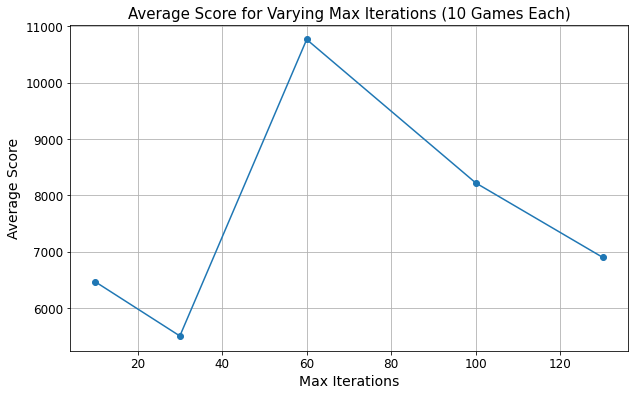

In [22]:
# Compute averages
avg_scores = df.groupby('max_iter')['score'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_scores.index, avg_scores.values, marker='o', linestyle='-')
plt.xlabel('Max Iterations', fontsize = 14)
plt.ylabel('Average Score', fontsize = 14)
plt.title('Average Score for Varying Max Iterations (10 Games Each)', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid()
plt.show()


## Score Distributions

/var/folders/mh/9cqvknfn3fqgp1kmv22bdf1m0000gn/T/ipykernel_1960/1455753474.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y='Game Score', data=score_df, palette = 'Set2')


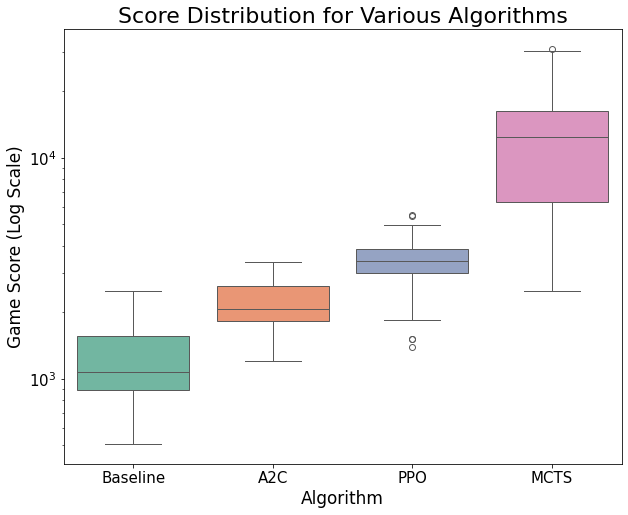

In [67]:
baseline = [1336, 696, 1088, 2480, 684, 1416, 556, 2060, 1240, 704, 952, 1632, 1570, 1486, 1039, 505, 1737, 961, 667, 1260, 880, 1531, 977, 832, 1049, 1722, 1619, 915, 1577, 933]
ppo = [2876, 3772, 3628, 3232, 4512, 3904, 5504, 3620, 3996, 1392, 2420, 1504, 3124, 3672, 1508, 3702, 1849, 3563, 4681, 5433, 3946, 3389, 3821, 3245, 3404, 3557, 4976, 3403, 4760, 2638, 2049, 2933, 3277, 3361, 3110]
a2c = [2180, 1824, 3348, 1792, 1944, 1336, 2832, 3204, 2292, 1904, 3355, 2048, 1689, 2603, 1196, 2672, 2635, 1774, 2068, 1714, 3216, 1507, 1852, 1852, 1224, 2635, 2022, 2369, 2864, 2342, 2404, 1807, 1992, 2576, 2424]
mcts = [3492, 2504, 26528, 7288, 30336, 4012, 11984, 16380, 3560, 12584, 5720, 11937, 5993, 12836, 17821, 9058, 13462, 18639, 31207, 15737, 9585, 12310, 17157, 17974, 3415, 8224, 13820, 14916, 3672, 15620]

score_df = pd.DataFrame({
    'Game Score': np.concatenate([baseline, a2c, ppo, mcts]),
    'Algorithm': ['Baseline'] * len(baseline) + ['A2C'] * len(a2c) + ['PPO'] * len(ppo) + ['MCTS'] * len(mcts)
})

plt.figure(figsize=(10, 8))
sns.boxplot(x='Algorithm', y='Game Score', data=score_df, palette = 'Set2')
plt.yscale('log')

plt.title('Score Distribution for Various Algorithms', fontsize = 22)
plt.xlabel("Algorithm", fontsize = 17)
plt.ylabel("Game Score (Log Scale)", fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [85]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

f_stat, p_value = stats.f_oneway(baseline, ppo, a2c, mcts)
print(f'ANOVA Test Statistic: {f_stat}')
print(f'ANOVA p-value: {p_value}')

combined_data = np.concatenate([baseline, ppo, a2c, mcts])
labels = ['Baseline'] * len(baseline) + ['PPO'] * len(ppo) + ['A2C'] * len(a2c) + ['MCTS'] * len(mcts)

tukey_result = pairwise_tukeyhsd(combined_data, labels)
print(tukey_result)

ANOVA Test Statistic: 61.009019652179404
ANOVA p-value: 1.9807875979806867e-24
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------
     A2C Baseline -1010.7048 0.6919  -3409.1525  1387.7429  False
     A2C     MCTS 10378.1952   -0.0   7979.7475 12776.6429   True
     A2C      PPO  1207.5714  0.524  -1096.7826  3511.9254  False
Baseline     MCTS    11388.9   -0.0   8899.9132 13877.8868   True
Baseline      PPO  2218.2762 0.0807   -180.1715  4616.7239  False
    MCTS      PPO -9170.6238   -0.0 -11569.0715 -6772.1761   True
-----------------------------------------------------------------


## Running Time

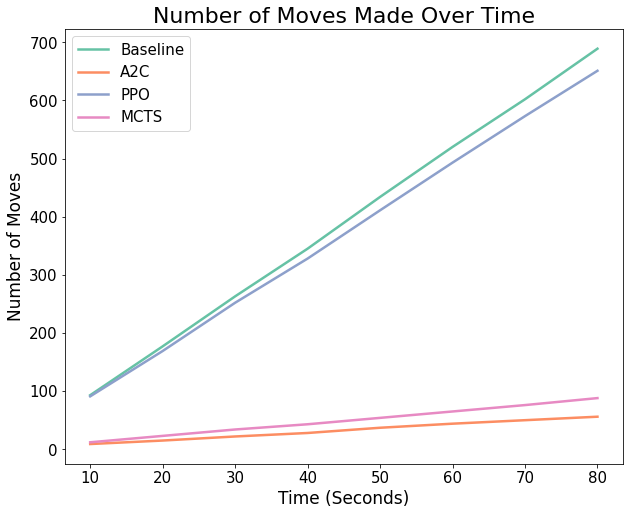

In [84]:
baseline_moves = [93, 177, 263, 345, 434, 520, 602, 689]
a2c_moves = [9, 15, 22, 28, 37, 44, 50, 56]
ppo_moves = [91, 169, 252, 328, 411, 493, 573, 651]
mcts_moves = [12, 23, 34, 43, 54, 65, 76, 88]
time = [10, 20, 30, 40, 50, 60, 70, 80]

time_df = pd.DataFrame({
    'Algorithm': ['Baseline'] * len(baseline_moves) + ['A2C'] * len(a2c_moves) + ['PPO'] * len(ppo_moves) + ['MCTS'] * len(mcts_moves),
    'Seconds': time * 4,
    'Moves': np.concatenate([baseline_moves, a2c_moves, ppo_moves, mcts_moves])
})

plt.figure(figsize=(10, 8))
sns.lineplot(x='Seconds', y='Moves', hue='Algorithm', data=time_df, palette='Set2', linewidth=2.5)  #)

plt.title('Number of Moves Made Over Time', fontsize = 22)
plt.xlabel('Time (Seconds)', fontsize = 17)
plt.ylabel('Number of Moves', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)